In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


In [5]:
print("X_train's shape: ", X_train.shape)
print("y_train's shape: ", y_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (60000, 28, 28)
y_train's shape:  (60000,)
X_test's shape:  (10000, 28, 28)
y_test's shape:  (10000,)


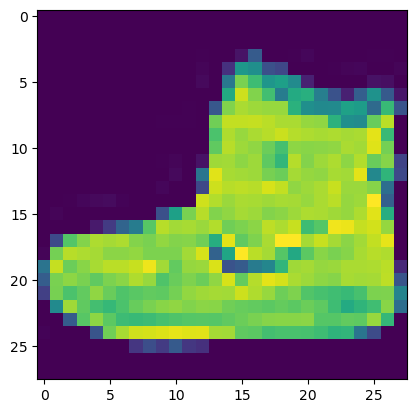

In [6]:
plt.imshow(X_train[0])

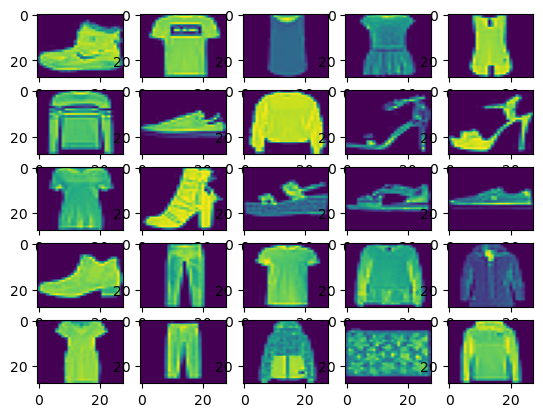

In [7]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1

plt.show()

In [8]:
print(X_train[0].max())
print(X_train[0].min())

255
0


In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [13]:
y_categorical_train = to_categorical(y_train)
y_categorical_test = to_categorical(y_test)

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    
    Dense(y_categorical_train.shape[1], activation='softmax')
])

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [33]:
model.fit(X_train, y_categorical_train, validation_data=(X_test, y_categorical_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 135s 70ms/step - loss: 0.4977 - val_loss: 0.3786
Epoch 2/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.3364 - val_loss: 0.3033
Epoch 3/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.2982 - val_loss: 0.2957
Epoch 4/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2719 - val_loss: 0.2788
Epoch 5/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.2564 - val_loss: 0.2632
Epoch 6/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.2413 - val_loss: 0.2656
Epoch 7/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.2290 - val_loss: 0.2495
Epoch 8/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.2174 - val_loss: 0.2530
Epoch 9/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.2083 - val_loss: 0.2377
Epoch 10/10
1875/1875 [==============================] 

In [34]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

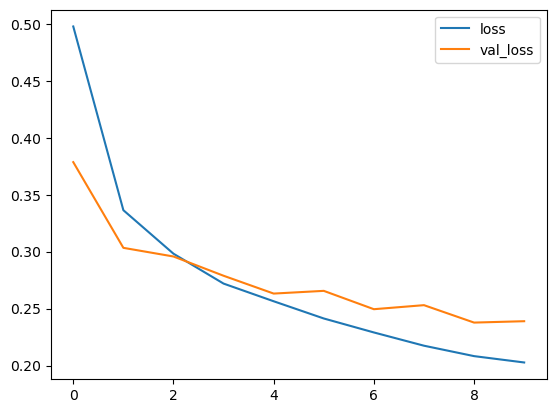

In [35]:
loss.plot()

In [36]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 [==============================] - 5s 17ms/step


In [37]:
y_test_classes = np.argmax(y_categorical_test, axis=1)

In [38]:
print(y_pred.shape)
print(y_test_classes.shape)

(10000,)
(10000,)


In [39]:
print(confusion_matrix(y_test_classes, y_pred))
print("\n\n")
print(classification_report(y_test_classes, y_pred, digits=4))

[[899   0  16  20   2   1  60   0   2   0]
 [  4 978   0  15   2   0   1   0   0   0]
 [ 16   0 888   8  44   0  44   0   0   0]
 [ 10   0   7 936  29   0  15   0   3   0]
 [  1   0  66  23 859   0  51   0   0   0]
 [  0   0   0   0   0 981   0  14   0   5]
 [166   0  63  24  69   0 674   0   4   0]
 [  0   0   0   0   0   5   0 986   0   9]
 [  6   0   4   3   4   1   3   2 977   0]
 [  0   0   0   0   0   5   0  44   0 951]]



              precision    recall  f1-score   support

           0     0.8158    0.8990    0.8554      1000
           1     1.0000    0.9780    0.9889      1000
           2     0.8506    0.8880    0.8689      1000
           3     0.9096    0.9360    0.9226      1000
           4     0.8513    0.8590    0.8552      1000
           5     0.9879    0.9810    0.9844      1000
           6     0.7948    0.6740    0.7294      1000
           7     0.9426    0.9860    0.9638      1000
           8     0.9909    0.9770    0.9839      1000
           9     0.9855  

<AxesSubplot:>

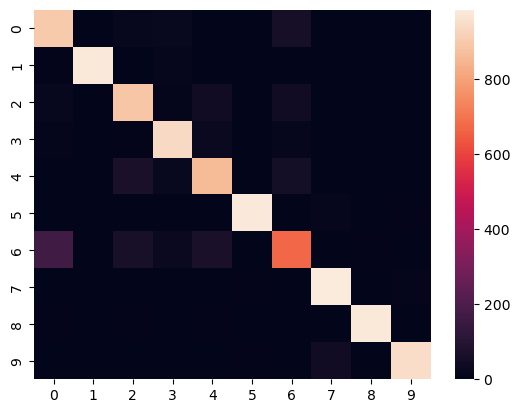

In [40]:
sns.heatmap(confusion_matrix(y_test_classes, y_pred))